In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans


In [36]:
df= pd.read_csv('../data/time_series_data_human_activities.csv')


In [37]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [38]:
df.shape

(1073623, 6)

In [39]:
df.dtypes

user           int64
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB


In [41]:
df.dtypes.value_counts()

float64    3
int64      2
object     1
Name: count, dtype: int64

In [42]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(f'Number of categorical fields: {len(categorical_cols)}')
print(f'Categorical fields: {categorical_cols}')

Number of categorical fields: 1
Categorical fields: Index(['activity'], dtype='object')


In [43]:
quantitative_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f'Number of quantitative fields: {len(quantitative_cols)}')
print(f'Quantitative fields: {quantitative_cols}')

Number of quantitative fields: 5
Quantitative fields: Index(['user', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')


In [44]:
#Timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])



In [45]:
#check for missing values
df.isnull().sum()


user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       0
dtype: int64

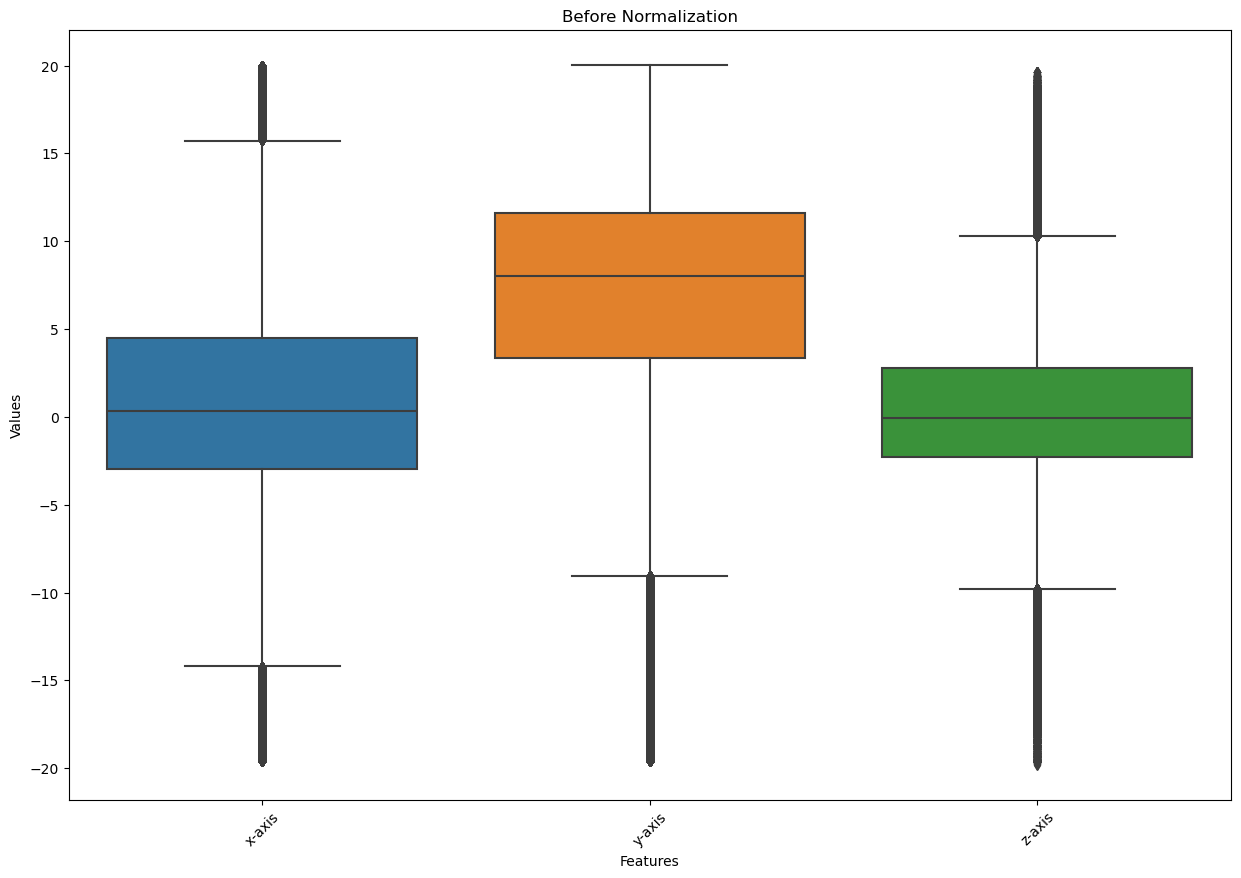

In [46]:
# Boxplot of the entire DataFrame to check for outliers. 'timestamp' and 'user' are not included
plt.figure(figsize=(15,10))
sns.boxplot(data=df.drop(['timestamp','user'], axis=1))
plt.xticks(rotation=45)

# Label the plot
plt.title('Before Normalization')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

In [47]:
#check for duplicates
df.duplicated().sum()

53788

In [48]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [49]:
#Remove outliers
df = df[(df['x-axis'] >= -14) & (df['x-axis'] <= 15)]
df = df[(df['y-axis'] >= -13) & (df['y-axis'] <= 20)]
df = df[(df['z-axis'] >= -14) & (df['z-axis'] <= 10)]

#Check the shape of the data
df.shape

(923433, 6)

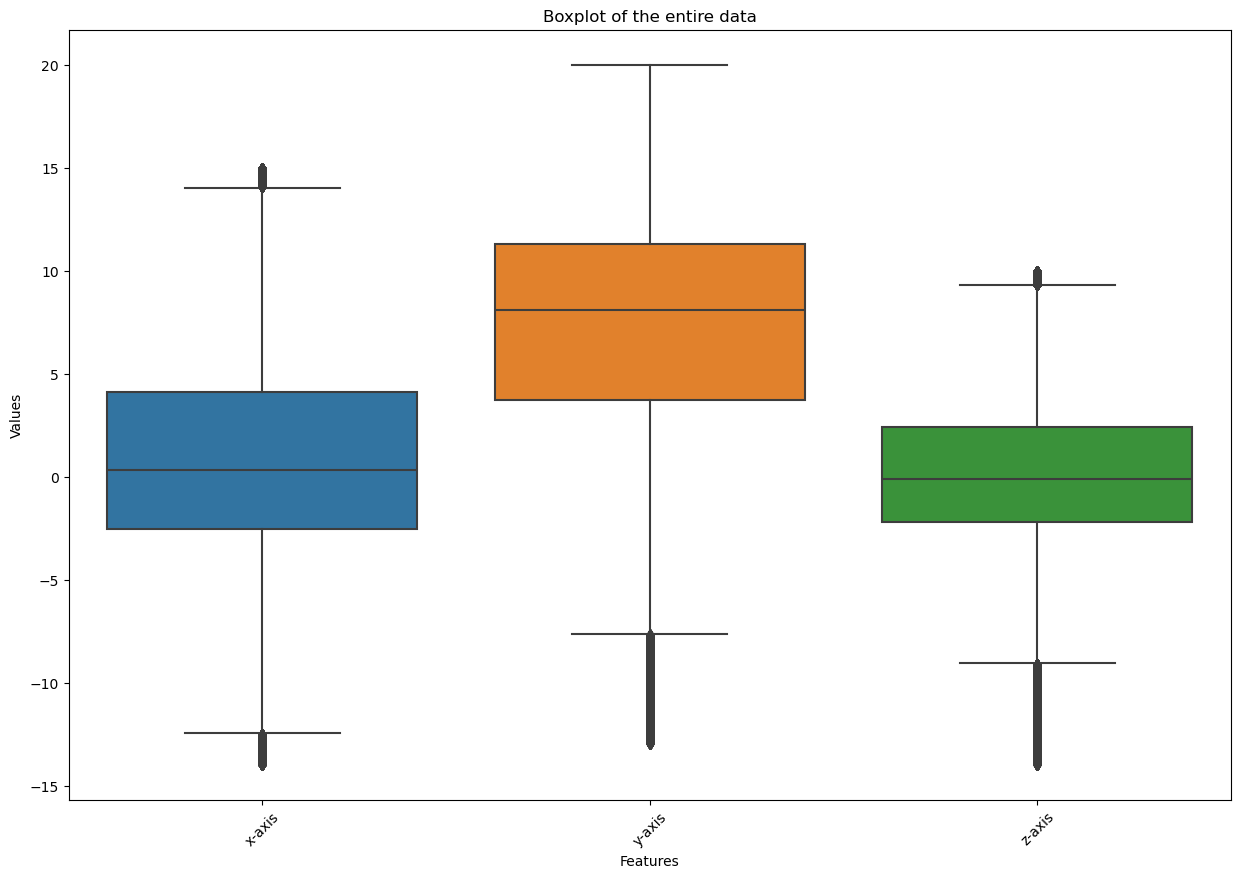

In [50]:
#Boxplot after removing outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df.drop(['timestamp','user'], axis=1))
plt.xticks(rotation=45)

# Label the plot
plt.title('Boxplot of the entire data')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

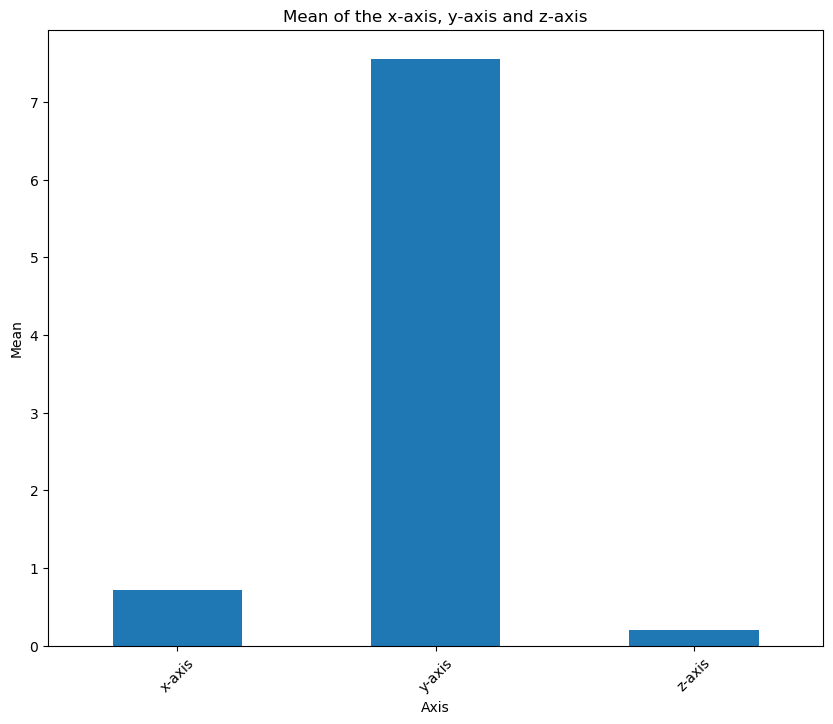

In [51]:
#Plot the mean of the x-axis, y-axis and z-axis
#Mean of y-axis, x-axis and z-axis
df[['x-axis','y-axis','z-axis']].mean()
plt.figure(figsize=(10,8))
df[['x-axis','y-axis','z-axis']].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Mean of the x-axis, y-axis and z-axis')
plt.ylabel('Mean')
plt.xlabel('Axis')
plt.show()


In [52]:
df['activity'].value_counts()

activity
Walking       381440
Jogging       229408
Upstairs      113931
Downstairs     94133
Sitting        57278
Standing       47243
Name: count, dtype: int64

##Activity Analysis: 
###What are the most common activities for each user?

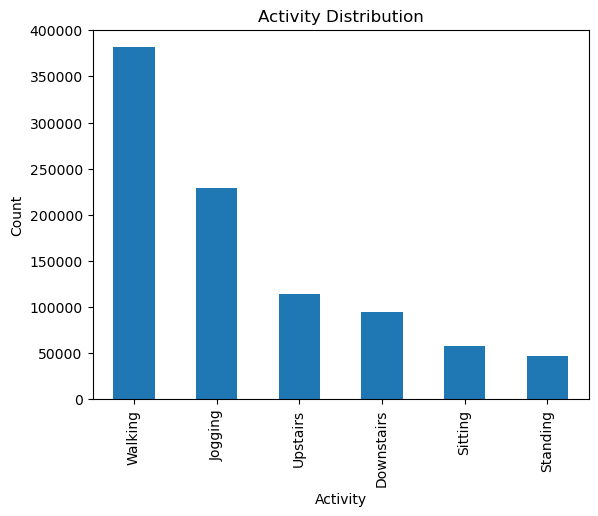

In [53]:
#Visualize Activity Distribution
df['activity'].value_counts().plot(kind='bar')
plt.title('Activity Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

In [54]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,1970-01-01 01:23:11.922345,0.69,10.80,-2.03
1,1,Walking,1970-01-01 01:23:11.972333,6.85,7.44,-0.50
2,1,Walking,1970-01-01 01:23:12.022351,0.93,5.63,-0.50
3,1,Walking,1970-01-01 01:23:12.072339,-2.11,5.01,-0.69
4,1,Walking,1970-01-01 01:23:12.122358,-4.59,4.29,-1.95


In [55]:
df.columns

Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')

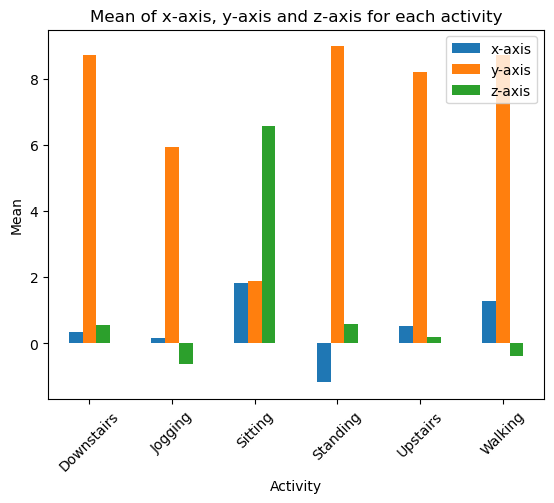

In [56]:
#Visualize the mean for each activity
df.groupby('activity')[['x-axis', 'y-axis', 'z-axis']].mean().plot(kind='bar')

plt.title('Mean of x-axis, y-axis and z-axis for each activity')
plt.xlabel('Activity')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.show()

In [57]:


# Check if 'timestamp' column exists in the dataframe
if 'timestamp' in df.columns:
    # Print the earliest and latest timestamps
    print('Earliest timestamp:', df['timestamp'].min())
    print('Latest timestamp:', df['timestamp'].max())
else:
    print("'timestamp' column does not exist in the dataframe.")


Earliest timestamp: 1970-01-01 00:01:13.452342
Latest timestamp: 1970-01-03 10:09:57.361451


In [58]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,1970-01-01 01:23:11.922345,0.69,10.80,-2.03
1,1,Walking,1970-01-01 01:23:11.972333,6.85,7.44,-0.50
2,1,Walking,1970-01-01 01:23:12.022351,0.93,5.63,-0.50
3,1,Walking,1970-01-01 01:23:12.072339,-2.11,5.01,-0.69
4,1,Walking,1970-01-01 01:23:12.122358,-4.59,4.29,-1.95


Time Analysis/Hourly trend: At what time of the day are certain activities most common? 

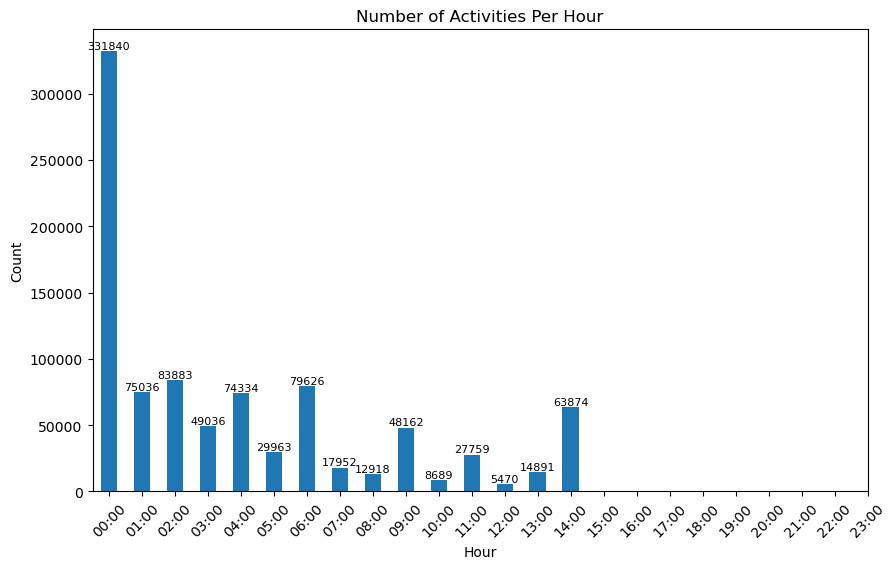

In [59]:
df['hour'] = df['timestamp'].dt.hour

# Calculate the number of activities for each hour of the day
activities_per_hour = df['hour'].value_counts().sort_index()

# Plot the number of activities for each hour of the day
plt.figure(figsize=(10,6))
activities_per_hour.plot(kind='bar')
plt.title('Number of Activities Per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')

# Set x-axis labels in 24-hour format and rotate them by 45 degrees
plt.xticks(range(24), [f'{i:02d}:00' for i in range(24)], rotation=45)

# Annotate the plot
for i, v in enumerate(activities_per_hour):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

Day of Week Analysis: On which days of the week are certain activities most common? 

In [60]:
df.columns

Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis', 'hour'], dtype='object')

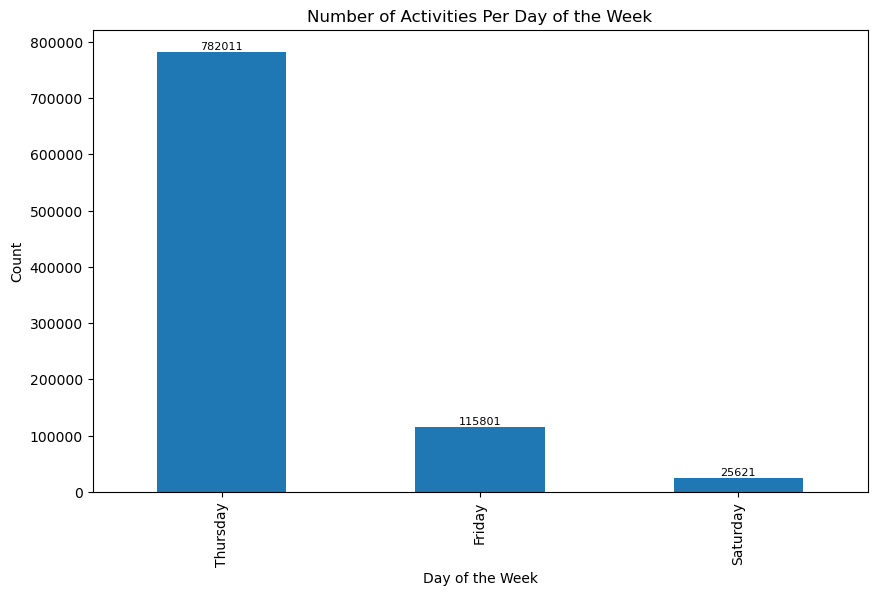

In [61]:
df['day_of_week'] = df['timestamp'].dt.day_name()

# Calculate the number of activities for each day of the week
activities_per_day = df['day_of_week'].value_counts()

# Plot the number of activities for each day of the week
plt.figure(figsize=(10,6))
activities_per_day.plot(kind='bar')
plt.title('Number of Activities Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

# Annotate the plot
for i, v in enumerate(activities_per_day):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

In [62]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis,hour,day_of_week
0,1,Walking,1970-01-01 01:23:11.922345,0.69,10.80,-2.03,1,Thursday
1,1,Walking,1970-01-01 01:23:11.972333,6.85,7.44,-0.50,1,Thursday
2,1,Walking,1970-01-01 01:23:12.022351,0.93,5.63,-0.50,1,Thursday
3,1,Walking,1970-01-01 01:23:12.072339,-2.11,5.01,-0.69,1,Thursday
4,1,Walking,1970-01-01 01:23:12.122358,-4.59,4.29,-1.95,1,Thursday


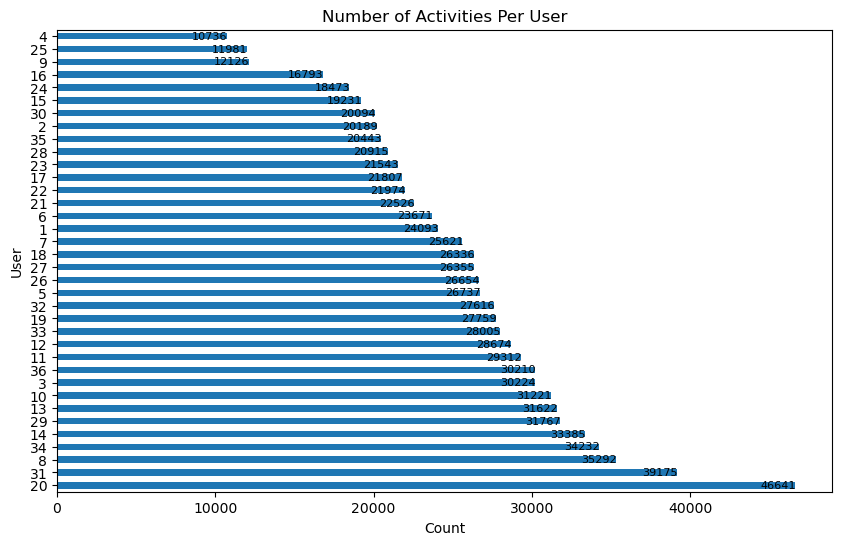

In [63]:
# User Behavior Analysis: How does the activity pattern vary between different users?
# Calculate the number of activities for each user
activities_per_user = df['user'].value_counts()

# Plot the number of activities for each user
plt.figure(figsize=(10,6))
activities_per_user.plot(kind='barh')
plt.title('Number of Activities Per User')
plt.ylabel('User')
plt.xlabel('Count')

# Annotate the plot
for i, v in enumerate(activities_per_user):
    plt.text(v + 50, i, str(v), ha='right', va='center', fontsize=8)

plt.show()

Sensor Data Analysis: How do the x, y, and z axis data vary with different activities? This could help in understanding the nature of different activities.

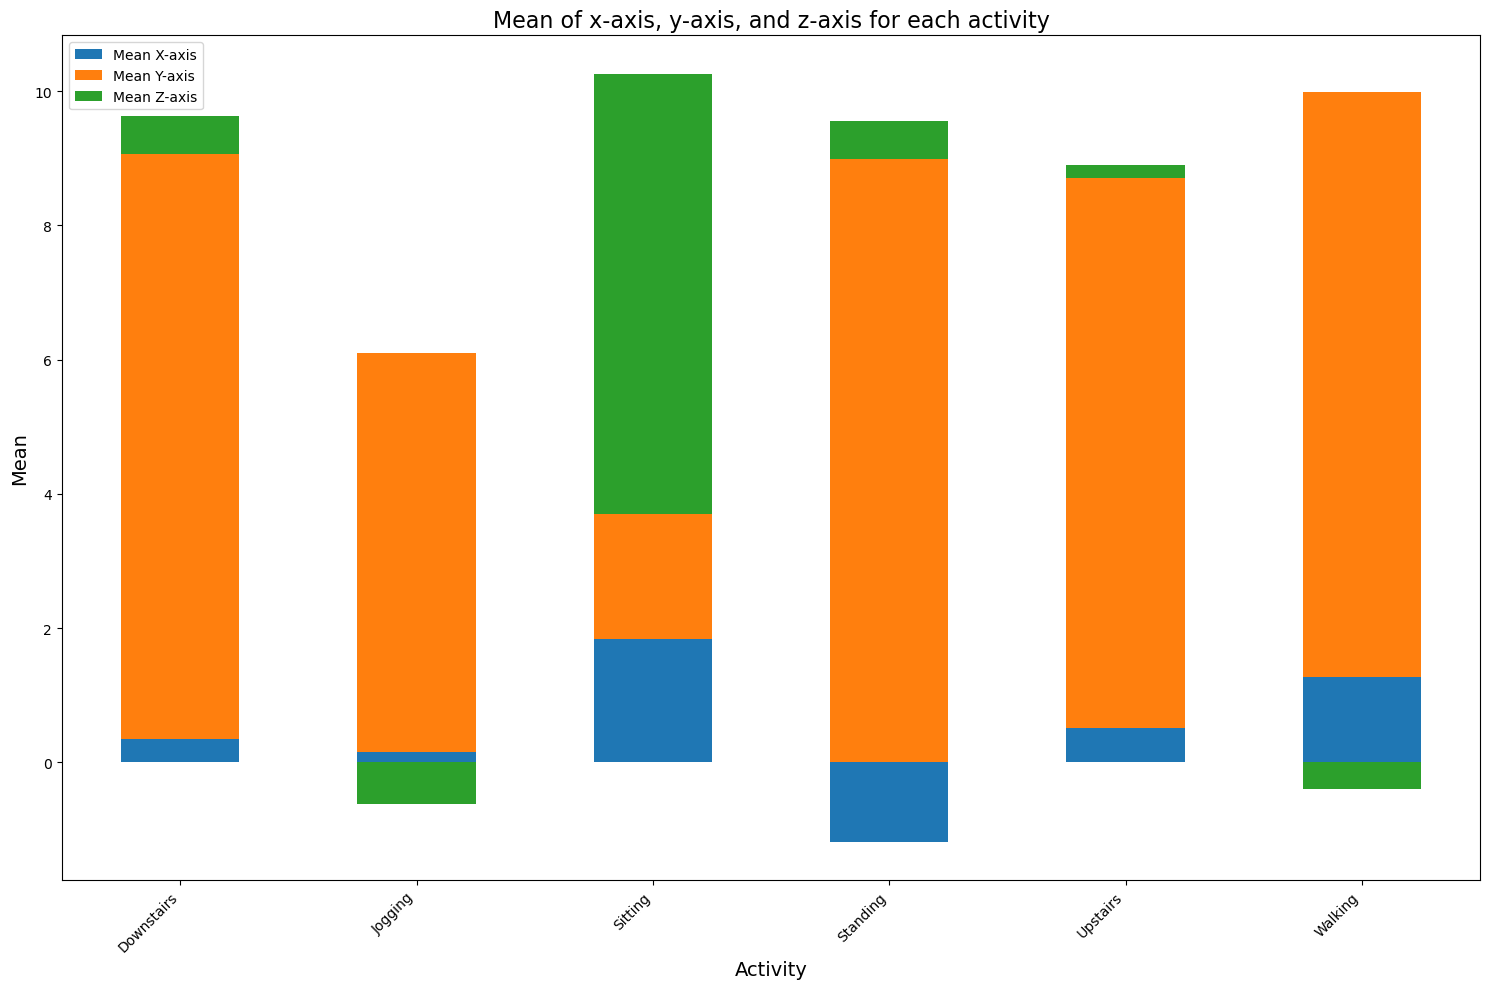

In [64]:
# Group the data by 'activity' and calculate the mean of 'x-axis', 'y-axis', and 'z-axis' for each activity.
mean_per_activity = df.groupby('activity')[['x-axis', 'y-axis', 'z-axis']].mean()

# Create a bar plot for the mean values of 'x-axis', 'y-axis', and 'z-axis' for each activity.
ax = mean_per_activity.plot(kind='bar', figsize=(15,10), stacked=True)

# Add a title to the plot
ax.set_title('Mean of x-axis, y-axis, and z-axis for each activity', fontsize=16)

# Add labels to the x-axis and y-axis
ax.set_xlabel('Activity', fontsize=14)
ax.set_ylabel('Mean', fontsize=14)

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add a legend to the plot with the label names
ax.legend(["Mean X-axis", "Mean Y-axis", "Mean Z-axis"])

# Display the plot
plt.tight_layout()
plt.show()

Movement Analysis: What insights can be derived from the x, y, and z-axis data? Can we identify specific patterns or anomalies in movement based on these values?

<Figure size 1500x1000 with 0 Axes>

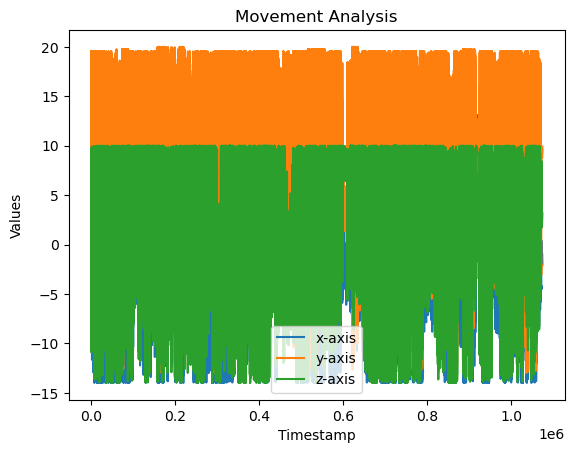

In [65]:
#Movement Analysis: What insights can be derived from the x, y, and z-axis data? Can we identify specific patterns or anomalies in movement based on these values?
#Plot the x, y, and z-axis data
plt.figure(figsize=(15,10))
df[['x-axis', 'y-axis', 'z-axis']].plot()
plt.title('Movement Analysis')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.show()


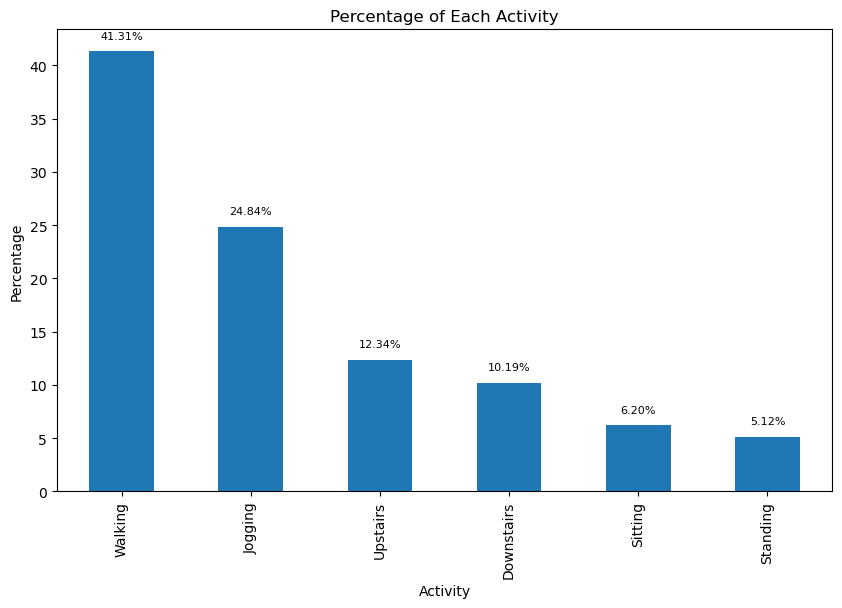

In [70]:
#Percentage of each activity
activity_percentage = df['activity'].value_counts(normalize=True) * 100

# Plot the percentage of each activity
plt.figure(figsize=(10,6))
activity_percentage.plot(kind='bar')
plt.title('Percentage of Each Activity')
plt.xlabel('Activity')
plt.ylabel('Percentage')

# Annotate the plot
for i, v in enumerate(activity_percentage):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()